In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import sklearn.preprocessing

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [4]:
df = pd.read_table("spambase.data", sep =',', header=None)
df=df.rename(columns={df.columns[57]:'spam'})


In [5]:
df

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.000,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.010,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,0.31,0.00,0.62,0.0,0.00,0.31,0.00,0.00,0.00,0.00,...,0.000,0.232,0.0,0.000,0.000,0.000,1.142,3,88,0
4597,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.353,0.000,0.000,1.555,4,14,0
4598,0.30,0.00,0.30,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.102,0.718,0.0,0.000,0.000,0.000,1.404,6,118,0
4599,0.96,0.00,0.00,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.057,0.0,0.000,0.000,0.000,1.147,5,78,0


In [6]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,spam
count,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,...,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000
mean,0.104553,0.213015,0.280656,0.065425,0.312223,0.095901,0.114208,0.105295,0.090067,0.239413,...,0.038575,0.139030,0.016976,0.269071,0.075811,0.044238,5.191515,52.172789,283.289285,0.394045
std,0.305358,1.290575,0.504143,1.395151,0.672513,0.273824,0.391441,0.401071,0.278616,0.644755,...,0.243471,0.270355,0.109394,0.815672,0.245882,0.429342,31.729449,194.891310,606.347851,0.488698
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.588000,6.000000,35.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.065000,0.000000,0.000000,0.000000,0.000000,2.276000,15.000000,95.000000,0.000000
75%,0.000000,0.000000,0.420000,0.000000,0.380000,0.000000,0.000000,0.000000,0.000000,0.160000,...,0.000000,0.188000,0.000000,0.315000,0.052000,0.000000,3.706000,43.000000,266.000000,1.000000
max,4.540000,14.280000,5.100000,42.810000,10.000000,5.880000,7.270000,11.110000,5.260000,18.180000,...,4.385000,9.752000,4.081000,32.478000,6.003000,19.829000,1102.500000,9989.000000,15841.000000,1.000000


<AxesSubplot:xlabel='spam', ylabel='count'>

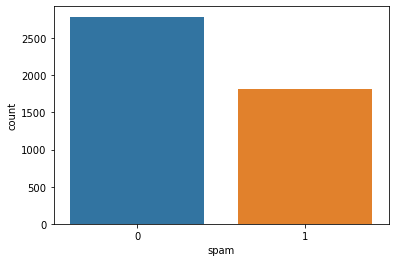

In [7]:
sns.countplot(x=df['spam'])


In [8]:
#sns.pairplot(df,hue='spam')


In [9]:
x=df.drop('spam',axis=1)
y=df['spam']
x_train, x_test, y_train,y_test=train_test_split(x,y,test_size=0.3)

In [10]:
print('Total data:',df.shape)
print('Train data:',x_train.shape,y_train.shape)
print('Test data:',x_test.shape,y_test.shape)

Total data: (4601, 58)
Train data: (3220, 57) (3220,)
Test data: (1381, 57) (1381,)


In [11]:
sc=StandardScaler()
sc.fit(x_train)
x_train=pd.DataFrame(sc.transform(x_train))
x_test=pd.DataFrame(sc.transform(x_test))
x_train

,0,1,2,3,4,5,6,7,8,9,...,47,48,49,50,51,52,53,54,55,56
0,-0.334401,-0.162715,-0.554725,-0.047334,2.236589,-0.347748,-0.288699,-0.256032,-0.317274,-0.401120,...,-0.10826,-0.15922,-0.488275,-0.143677,-0.303159,-0.303848,-0.099071,-0.144976,-0.228472,-0.420789
1,0.254231,-0.162715,0.524136,-0.047334,1.130654,0.289902,1.052588,-0.256032,1.590255,0.510781,...,-0.10826,-0.15922,0.076313,-0.143677,-0.024768,0.913105,-0.099071,-0.040432,0.026196,0.262243
2,-0.334401,-0.162715,-0.554725,-0.047334,-0.455488,-0.347748,-0.288699,-0.256032,-0.317274,3.820644,...,-0.10826,-0.15922,-0.488275,-0.143677,0.184305,-0.303848,-0.099071,-0.145640,-0.209951,-0.412938
3,-0.334401,-0.162715,-0.554725,-0.047334,-0.455488,-0.347748,-0.288699,-0.256032,-0.317274,-0.401120,...,-0.10826,-0.15922,-0.229789,-0.143677,-0.218188,-0.303848,-0.099071,-0.139339,-0.191429,-0.318727
4,-0.334401,-0.162715,-0.554725,-0.047334,-0.455488,-0.347748,-0.288699,-0.256032,-0.317274,-0.401120,...,-0.10826,-0.15922,-0.488275,-0.143677,-0.303159,-0.303848,-0.099071,-0.178798,-0.242363,-0.431781
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3215,-0.334401,-0.162715,0.084600,-0.047334,0.490377,1.954875,0.506138,0.465762,-0.317274,-0.401120,...,-0.10826,-0.15922,-0.131156,-0.143677,-0.303159,0.326574,-0.099071,-0.155398,-0.200690,-0.221375
3216,-0.334401,-0.162715,0.544115,-0.047334,-0.455488,1.600625,-0.288699,0.352981,-0.317274,-0.401120,...,-0.10826,-0.15922,0.171545,-0.143677,0.347538,0.857245,1.320843,-0.116792,-0.084932,0.017294
3217,-0.334401,0.053856,-0.035273,-0.047334,0.112031,-0.347748,0.034203,-0.256032,-0.317274,0.037943,...,-0.10826,-0.15922,-0.488275,-0.143677,-0.278562,-0.216068,2.069835,0.363771,0.248451,1.281296
3218,-0.334401,-0.162715,1.183441,0.590015,0.810516,1.175526,-0.288699,-0.256032,-0.317274,-0.401120,...,-0.10826,-0.15922,0.525263,0.342557,-0.237195,-0.303848,-0.099071,-0.105186,-0.177538,-0.106751


In [12]:
C=0.01
clf=SVC(kernel='linear',C=C)
clf.fit(x_train,y_train)
print('train accurcay:{acc:.5f}'.format(acc=clf.score(x_train,y_train)))
print('test accurcay:{acc:.5f}'.format(acc=clf.score(x_test,y_test)))

train accurcay:0.92112
test accurcay:0.91093


In [13]:
C=0.1
clf=SVC(kernel='linear',C=C)
clf.fit(x_train,y_train)
print('train accurcay:{acc:.5f}'.format(acc=clf.score(x_train,y_train)))
print('test accurcay:{acc:.5f}'.format(acc=clf.score(x_test,y_test)))

train accurcay:0.93043
test accurcay:0.91455


In [14]:
C=1
clf=SVC(kernel='linear',C=C)
clf.fit(x_train,y_train)
print('train accurcay:{acc:.5f}'.format(acc=clf.score(x_train,y_train)))
print('test accurcay:{acc:.5f}'.format(acc=clf.score(x_test,y_test)))

train accurcay:0.92981
test accurcay:0.92035


In [15]:
C=10
clf=SVC(kernel='linear',C=C)
clf.fit(x_train,y_train)
print('train accurcay:{acc:.5f}'.format(acc=clf.score(x_train,y_train)))
print('test accurcay:{acc:.5f}'.format(acc=clf.score(x_test,y_test)))

train accurcay:0.93168
test accurcay:0.92686


In [16]:
C=100
clf=SVC(kernel='linear',C=C)
clf.fit(x_train,y_train)
print('train accurcay:{acc:.5f}'.format(acc=clf.score(x_train,y_train)))
print('test accurcay:{acc:.5f}'.format(acc=clf.score(x_test,y_test)))

train accurcay:0.93043
test accurcay:0.92397


In [17]:
C=1000
clf=SVC(kernel='linear',C=C)
clf.fit(x_train,y_train)
print('train accurcay:{acc:.5f}'.format(acc=clf.score(x_train,y_train)))
print('test accurcay:{acc:.5f}'.format(acc=clf.score(x_test,y_test)))

train accurcay:0.93012
test accurcay:0.92686


In [18]:
C=10000
clf=SVC(kernel='linear',C=C)
clf.fit(x_train,y_train)
print('train accurcay:{acc:.5f}'.format(acc=clf.score(x_train,y_train)))
print('test accurcay:{acc:.5f}'.format(acc=clf.score(x_test,y_test)))

train accurcay:0.93075
test accurcay:0.92469


In [19]:
C=0.01
clf=SVC(kernel='poly',degree=2,C=C)
clf.fit(x_train,y_train)
print('train accurcay:{acc:.5f}'.format(acc=clf.score(x_train,y_train)))
print('test accurcay:{acc:.5f}'.format(acc=clf.score(x_test,y_test)))

train accurcay:0.62857
test accurcay:0.61188


In [20]:
C=0.1
clf=SVC(kernel='poly',degree=2,C=C)
clf.fit(x_train,y_train)
print('train accurcay:{acc:.5f}'.format(acc=clf.score(x_train,y_train)))
print('test accurcay:{acc:.5f}'.format(acc=clf.score(x_test,y_test)))

train accurcay:0.72981
test accurcay:0.70963


In [21]:
C=1
clf=SVC(kernel='poly',degree=2,C=C)
clf.fit(x_train,y_train)
print('train accurcay:{acc:.5f}'.format(acc=clf.score(x_train,y_train)))
print('test accurcay:{acc:.5f}'.format(acc=clf.score(x_test,y_test)))

train accurcay:0.85373
test accurcay:0.82259


In [22]:
C=10
clf=SVC(kernel='poly',degree=2,C=C)
clf.fit(x_train,y_train)
print('train accurcay:{acc:.5f}'.format(acc=clf.score(x_train,y_train)))
print('test accurcay:{acc:.5f}'.format(acc=clf.score(x_test,y_test)))

train accurcay:0.95280
test accurcay:0.91528


In [23]:
C=100
clf=SVC(kernel='poly',degree=2,C=C)
clf.fit(x_train,y_train)
print('train accurcay:{acc:.5f}'.format(acc=clf.score(x_train,y_train)))
print('test accurcay:{acc:.5f}'.format(acc=clf.score(x_test,y_test)))

train accurcay:0.97453
test accurcay:0.91093


In [24]:
C=1000
clf=SVC(kernel='poly',degree=2,C=C)
clf.fit(x_train,y_train)
print('train accurcay:{acc:.5f}'.format(acc=clf.score(x_train,y_train)))
print('test accurcay:{acc:.5f}'.format(acc=clf.score(x_test,y_test)))

train accurcay:0.98602
test accurcay:0.89935


In [25]:
C=10000
clf=SVC(kernel='poly',degree=2,C=C)
clf.fit(x_train,y_train)
print('train accurcay:{acc:.5f}'.format(acc=clf.score(x_train,y_train)))
print('test accurcay:{acc:.5f}'.format(acc=clf.score(x_test,y_test)))

train accurcay:0.99317
test accurcay:0.88269


In [26]:
C=0.01
clf=SVC(kernel='rbf',C=C)
clf.fit(x_train,y_train)
print('train accurcay:{acc:.5f}'.format(acc=clf.score(x_train,y_train)))
print('test accurcay:{acc:.5f}'.format(acc=clf.score(x_test,y_test)))

train accurcay:0.70901
test accurcay:0.69008


In [27]:
C=0.1
clf=SVC(kernel='rbf',C=C)
clf.fit(x_train,y_train)
print('train accurcay:{acc:.5f}'.format(acc=clf.score(x_train,y_train)))
print('test accurcay:{acc:.5f}'.format(acc=clf.score(x_test,y_test)))

train accurcay:0.90963
test accurcay:0.90731


In [28]:
C=1
clf=SVC(kernel='rbf',C=C)
clf.fit(x_train,y_train)
print('train accurcay:{acc:.5f}'.format(acc=clf.score(x_train,y_train)))
print('test accurcay:{acc:.5f}'.format(acc=clf.score(x_test,y_test)))

train accurcay:0.94752
test accurcay:0.93049


In [29]:
C=10
clf=SVC(kernel='rbf',C=C)
clf.fit(x_train,y_train)
print('train accurcay:{acc:.5f}'.format(acc=clf.score(x_train,y_train)))
print('test accurcay:{acc:.5f}'.format(acc=clf.score(x_test,y_test)))

train accurcay:0.96739
test accurcay:0.93628


In [30]:
C=100
clf=SVC(kernel='rbf',C=C)
clf.fit(x_train,y_train)
print('train accurcay:{acc:.5f}'.format(acc=clf.score(x_train,y_train)))
print('test accurcay:{acc:.5f}'.format(acc=clf.score(x_test,y_test)))

train accurcay:0.98571
test accurcay:0.92324


In [31]:
C=1000
clf=SVC(kernel='rbf',C=C)
clf.fit(x_train,y_train)
print('train accurcay:{acc:.5f}'.format(acc=clf.score(x_train,y_train)))
print('test accurcay:{acc:.5f}'.format(acc=clf.score(x_test,y_test)))

train accurcay:0.99286
test accurcay:0.91166


In [32]:
C=10000
clf=SVC(kernel='rbf',C=C)
clf.fit(x_train,y_train)
print('train accurcay:{acc:.5f}'.format(acc=clf.score(x_train,y_train)))
print('test accurcay:{acc:.5f}'.format(acc=clf.score(x_test,y_test)))

train accurcay:0.99565
test accurcay:0.90731
